# 03 - Feature Engineering

Now that we have a cleaned dataset, we will be selecting, creating, and transforming our features for the models we will be training in the next step. This will ensure that we are maximizing the predictive value of the data we are using.

## Imports and Loading data

In [37]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

# Load the cleaned data
df = pd.read_csv('/Users/zulykathlucero/Desktop/predicting-employee-attrition/data/processed/cleaned_attrition_data.csv')
print(df.columns.tolist())
df.shape

['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Department_Research & Development', 'Department_Sales', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MonthlyI

(1470, 44)

## Creating New Features

I created two new variables in order to capture the career dynamics that could be at play in the lives of the employees. One is  JobRatio, which measures the proportion of the employee's career spent at the company. The second variable created is AvgYearsPerJob, which is calculated by dividing TotalWorkingYears by NumCompaniesWorked. One edgecase we need to address is in the case NumCompaniesWorked or TotalWorkingYears is equal to 0, we must be careful not to divide by 0.

In [38]:
# Creating JobRatio by dividing years spent at the current company by the number of years working in total
df['JobRatio'] = np.where(
    df['TotalWorkingYears'] == 0, # Make sure not to divide by 0
    0,  # If the denominator is 0, just insert a placeholder
    df['YearsAtCompany'] / df['TotalWorkingYears']
)

# Creating the AvgYearsPerJob variable by dividing total years spent working by the number of jobs held
df['AvgYearsPerJob'] = np.where(
    df['NumCompaniesWorked'] == 0, # Address edgecase of denominator is equal to 0
    df['TotalWorkingYears'],  # Assume all years were done at one job
    df['TotalWorkingYears'] / df['NumCompaniesWorked']
)

## Feature Scaling

In order to ensure consistency accross models, I will be using z-score normalization on the continuous variables. This will standardize the data so that the models can easily compare different features without being thrown by the difference in magnitude.

In [39]:
# Define columns to scale
scale_cols = [
    'Age', 'DistanceFromHome', 'TotalWorkingYears',
    'YearsAtCompany', 'MonthlyIncomeLog',
    'JobRatio', 'AvgYearsPerJob'
]

# Apply scaling
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

## Feature Selection

In order to select the features that are most likely to help with the predictive modeling, and to help reducing noise, I will be using the information gain technique to create an alternate dataset with the most influencial features. Mutual information feature selection measures the amount of information one variable provides about another, giving us an insight as to how important that variable is to predicting the target outcome. I chose this method because it works with various kinds of models.

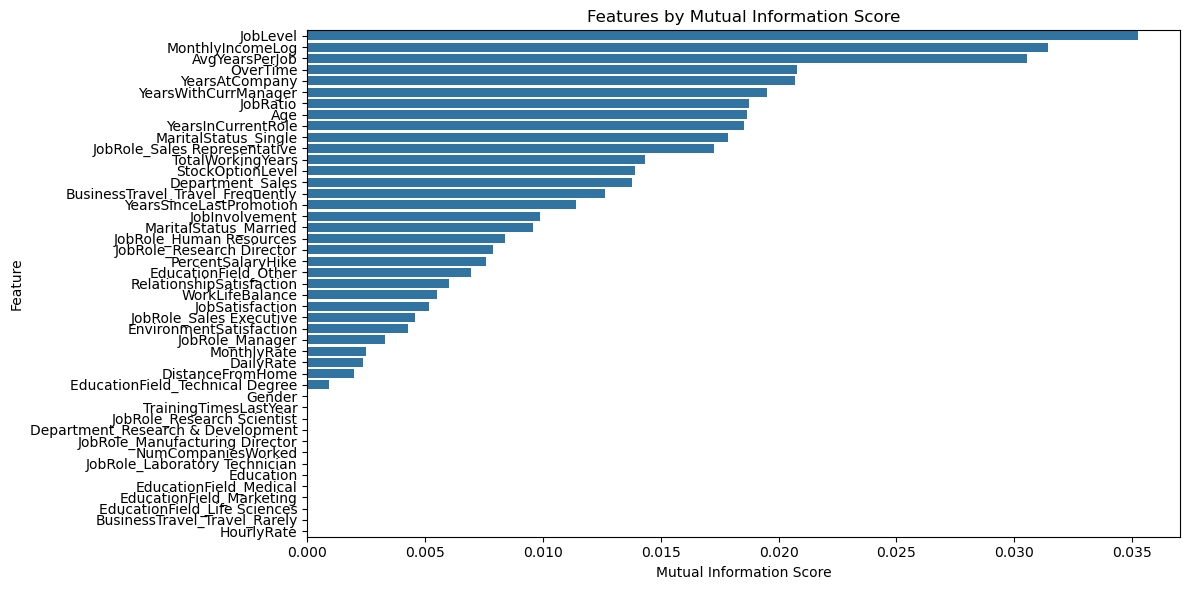

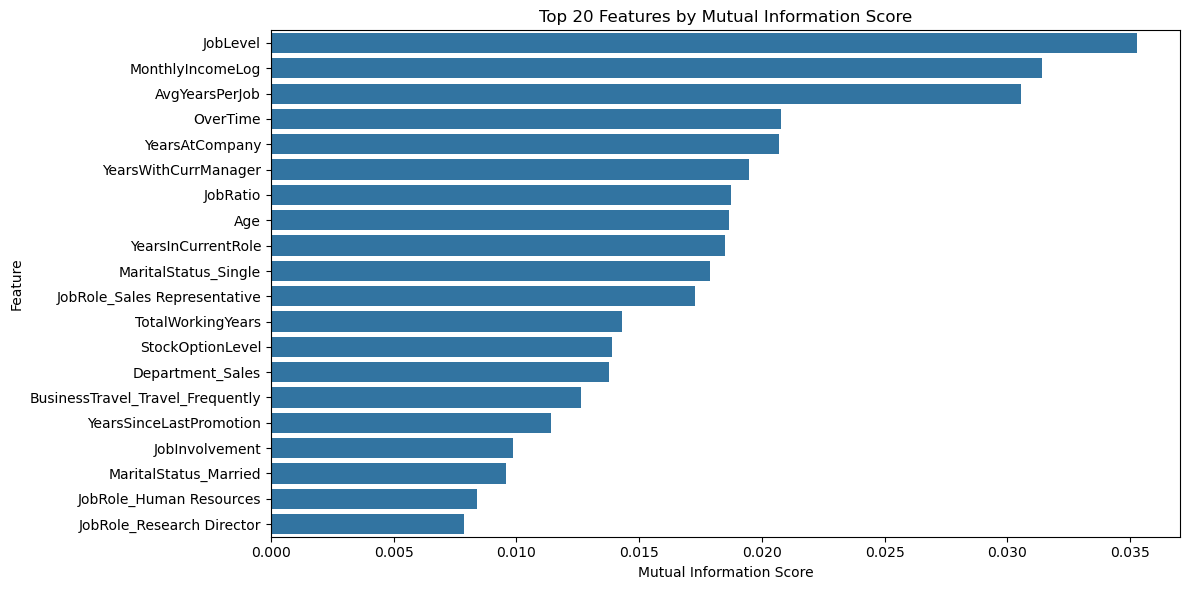

In [40]:
# Generating the MI scores
X = df.drop(columns='Attrition')
y = df['Attrition']

mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI Score': mi_scores
}).sort_values(by='MI Score', ascending=False)

mi_df.head(10)

# Creating visualizations
plt.figure(figsize=(12, 6))
sns.barplot(data=mi_df, x='MI Score', y='Feature')
plt.title('Features by Mutual Information Score')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/mutual_information_all.png')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=mi_df.head(20), x='MI Score', y='Feature')
plt.title('Top 20 Features by Mutual Information Score')
plt.xlabel('Mutual Information Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('/Users/zulykathlucero/Desktop/predicting-employee-attrition/reports/figures/mutual_information_top20.png')
plt.show()

## Saving Dataset

Now that we have optimized our features, we will save the new dataset to be used for training our models. I will be saving one version with all the features and another with only the top 20 most influential features according to their MI score. We can compare which version performs better in the modeling stage.

In [41]:
# Full Dataset
df.to_csv('/Users/zulykathlucero/Desktop/predicting-employee-attrition/data/processed/features_full.csv', index=False)

# Top 20 Dataset
top_features = mi_df['Feature'].head(20).tolist() + ['Attrition']
df[top_features].to_csv('/Users/zulykathlucero/Desktop/predicting-employee-attrition/data/processed/features_top20.csv', index=False)

## Summary of Feature Engineering

- Created new variables: 'JobRatio' and 'AvgYearsPerJob'
- Feature scaling using z-score normalization: 'Age', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'MonthlyIncomeLog', 'JobRatio', 'AvgYearsPerJob'
- Ranked features using mutual information scores and picked the top 20
- Saved two datasets: 'features_full.csv' and 'features_top20.csv'